In [19]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import mstats

In [20]:
os.chdir('/Users/pratiksharma/Documents/major project IPBA')

In [21]:
df=pd.read_csv('accident_data.csv')

In [22]:
df.head(100)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,04/01/2005,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,05/01/2005,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,06/01/2005,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,07/01/2005,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,NaN,0.0,NaN,0.0,Slight,None,10/01/2005,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,200501BS70077,B,450.0,Unclassified,0.0,Slight,None,08/03/2005,Tuesday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30,12:20,Urban,Fine no high winds,2005,No
96,200501BS70078,A,3220.0,C,0.0,Slight,None,08/03/2005,Tuesday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30,08:56,Urban,Fine no high winds,2005,No
97,200501BS70079,A,3220.0,A,308.0,Slight,None,09/03/2005,Wednesday,1.0,...,Metropolitan Police,Dry,Single carriageway,Auto signal part defective,30,16:55,Urban,Fine no high winds,2005,No
98,200501BS70080,A,4204.0,Unclassified,0.0,Slight,None,09/03/2005,Wednesday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30,15:35,Urban,Fine no high winds,2005,No


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1048575 non-null  object 
 1   1st_Road_Class                               742986 non-null   object 
 2   1st_Road_Number                              1048573 non-null  float64
 3   2nd_Road_Class                               608751 non-null   object 
 4   2nd_Road_Number                              1037772 non-null  float64
 5   Accident_Severity                            1048575 non-null  object 
 6   Carriageway_Hazards                          1048546 non-null  object 
 7   Date                                         1048575 non-null  object 
 8   Day_of_Week                                  1048575 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  1

# Exploratory Data Analysis



We'll start by checking missing values!

# Checking missing values

A simple heatmap to see where we are missing data

<Axes: >

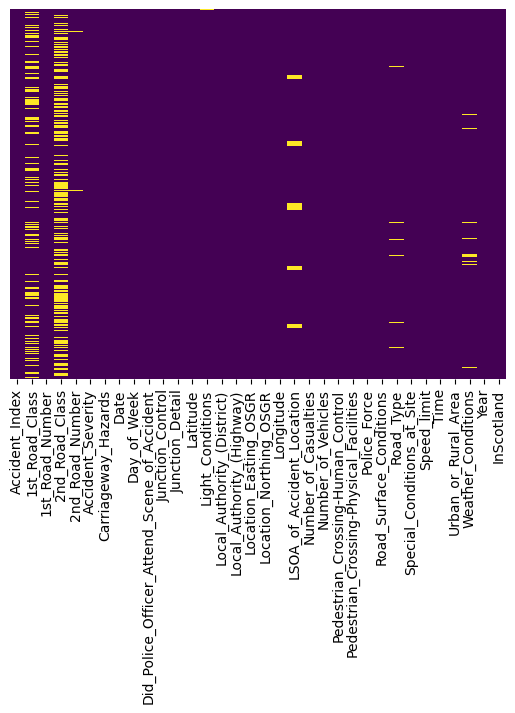

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Multivariate Analysis

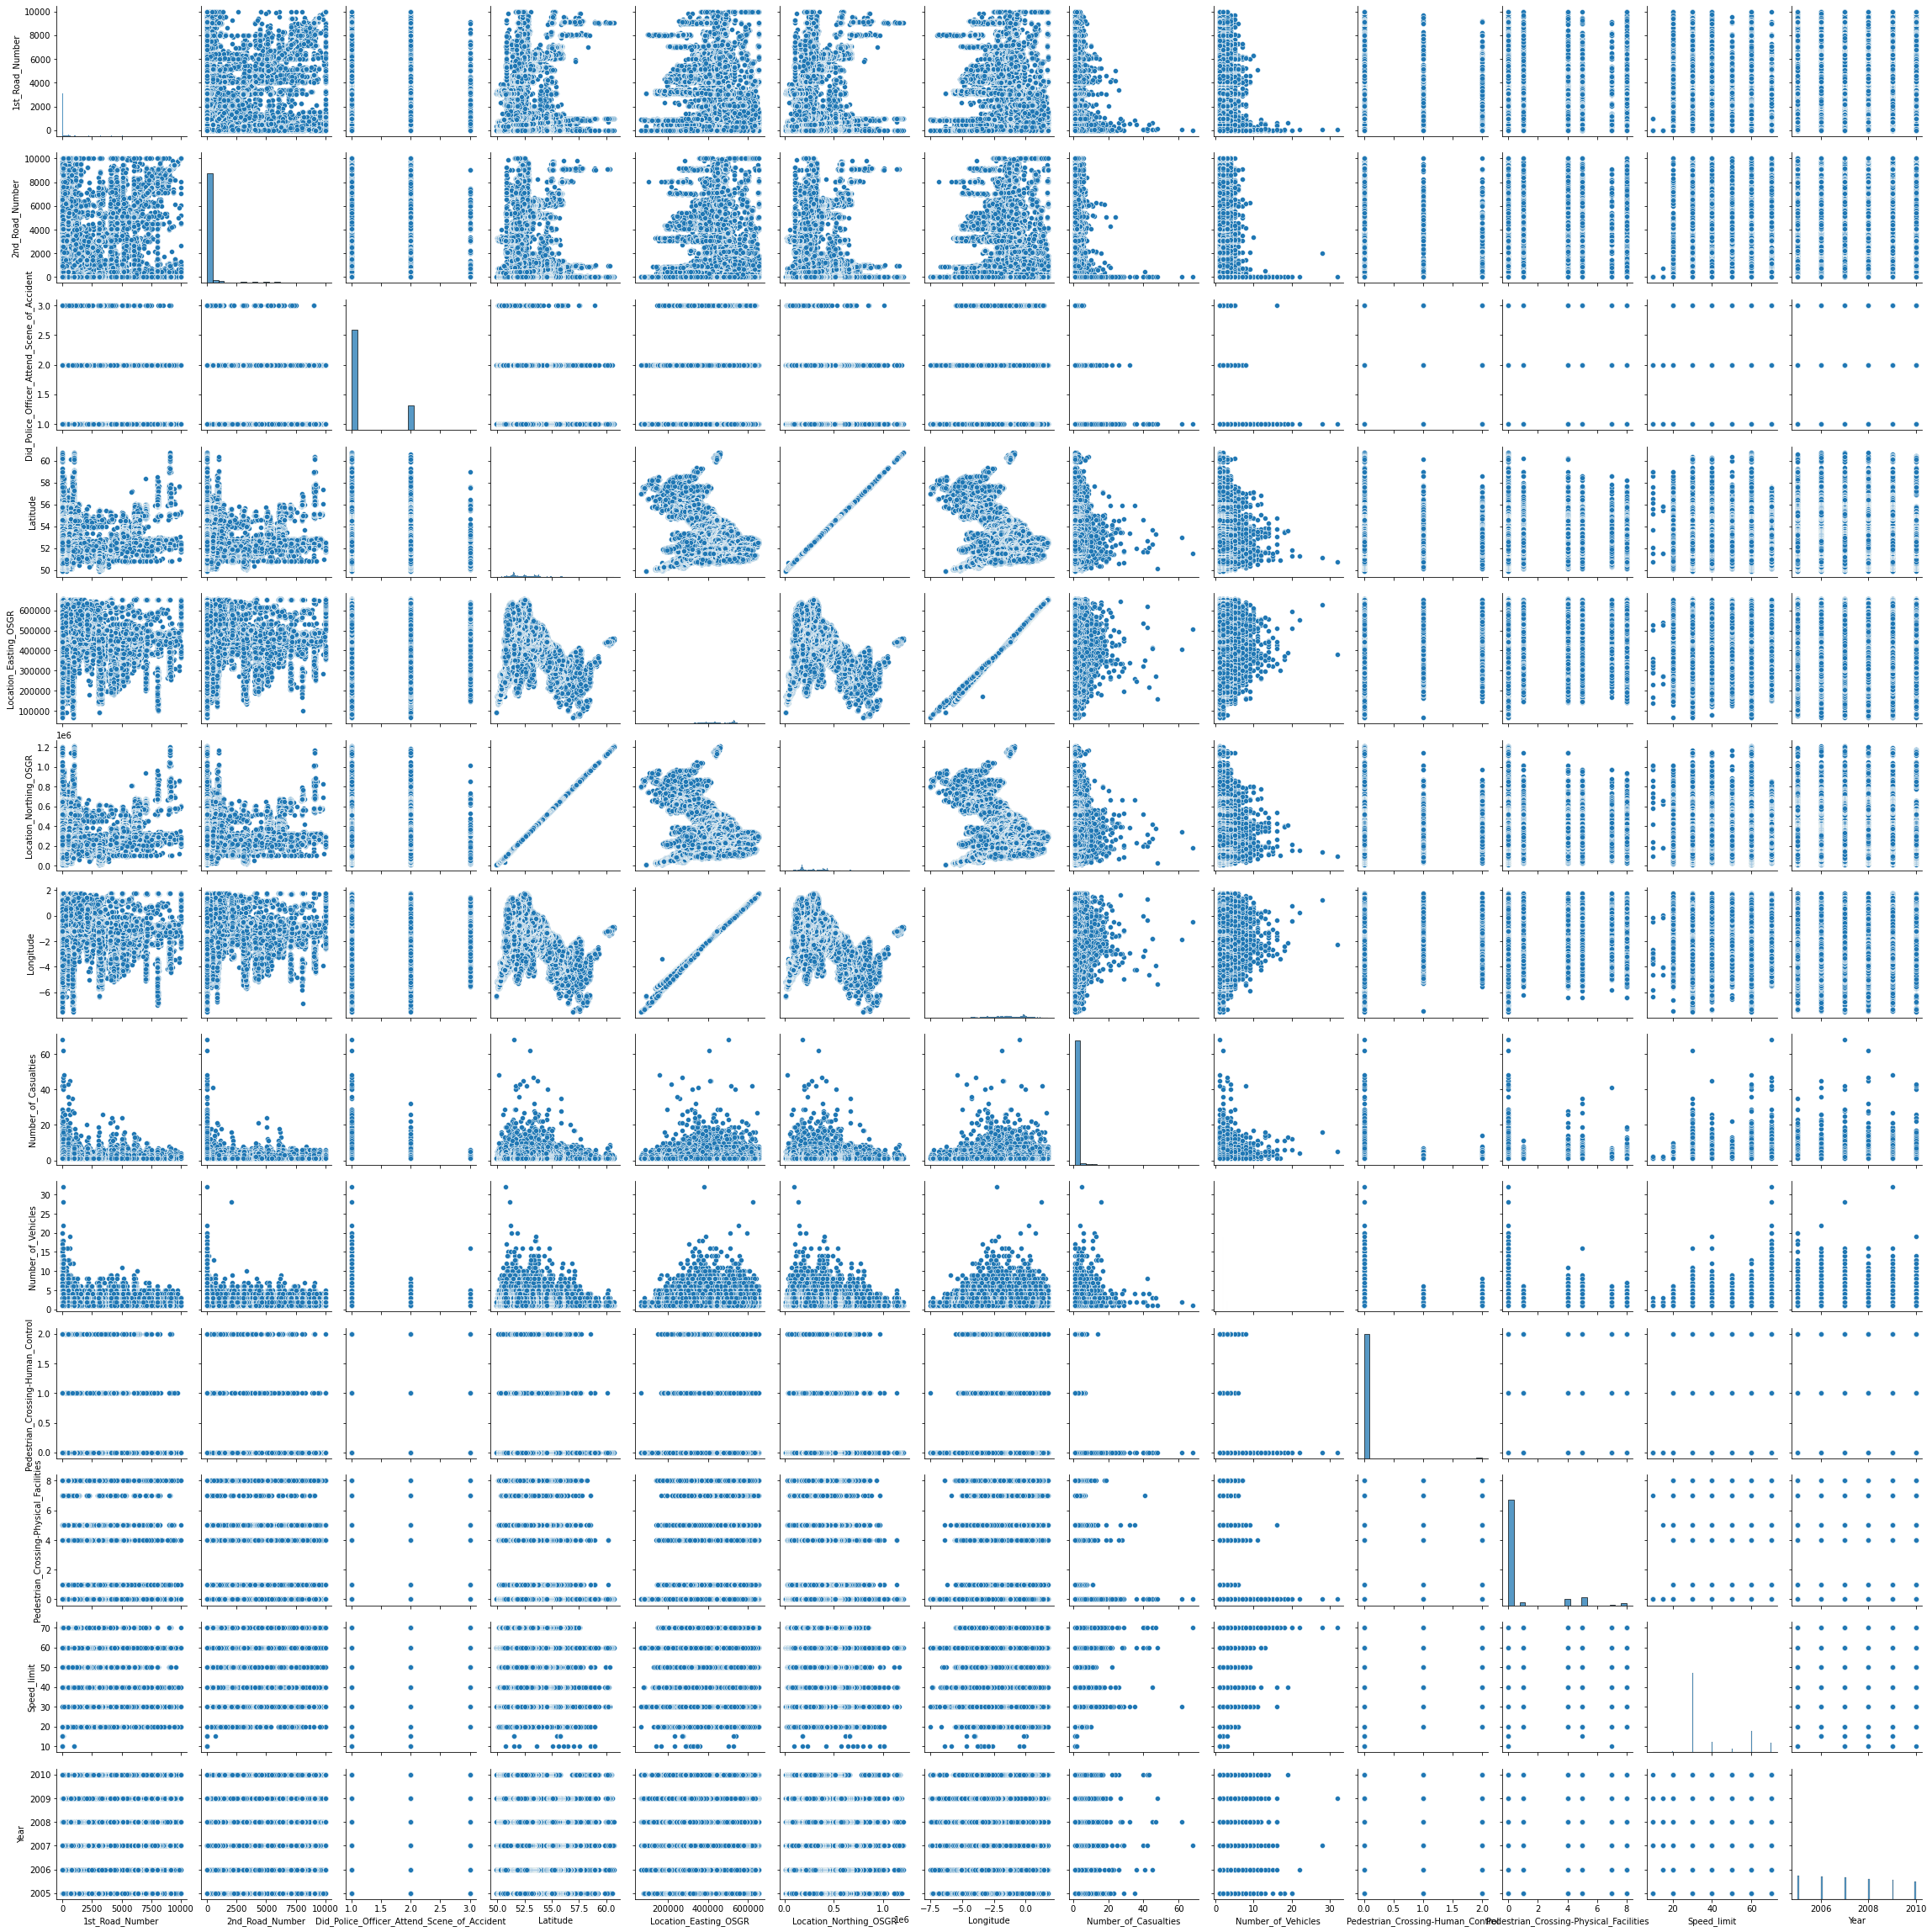

In [19]:
sns.pairplot(df)

In [8]:
null=df.isnull().sum()

In [9]:
print(null)

Accident_Index                                      0
1st_Road_Class                                 305589
1st_Road_Number                                     2
2nd_Road_Class                                 439824
2nd_Road_Number                                 10803
Accident_Severity                                   0
Carriageway_Hazards                                29
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident       269
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                          111
Light_Conditions                                 2084
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                             111
Location_Northing_OSGR                            111
Longitude                   

In [10]:
df.shape

(1048575, 34)

### Percentage of data being null


In [11]:
df.isnull().mean()

Accident_Index                                 0.000000
1st_Road_Class                                 0.291433
1st_Road_Number                                0.000002
2nd_Road_Class                                 0.419449
2nd_Road_Number                                0.010303
Accident_Severity                              0.000000
Carriageway_Hazards                            0.000028
Date                                           0.000000
Day_of_Week                                    0.000000
Did_Police_Officer_Attend_Scene_of_Accident    0.000257
Junction_Control                               0.000000
Junction_Detail                                0.000000
Latitude                                       0.000106
Light_Conditions                               0.001987
Local_Authority_(District)                     0.000000
Local_Authority_(Highway)                      0.000000
Location_Easting_OSGR                          0.000106
Location_Northing_OSGR                         0

### Categorical Variables having missing values 

In [12]:
missing_categorical= [var for var in df.columns if df[var].isnull().mean()>0 and df[var].dtypes == 'O']

In [13]:
missing_categorical

['1st_Road_Class',
 '2nd_Road_Class',
 'Carriageway_Hazards',
 'Light_Conditions',
 'LSOA_of_Accident_Location',
 'Road_Surface_Conditions',
 'Road_Type',
 'Special_Conditions_at_Site',
 'Time',
 'Urban_or_Rural_Area',
 'Weather_Conditions',
 'InScotland']

<Axes: >

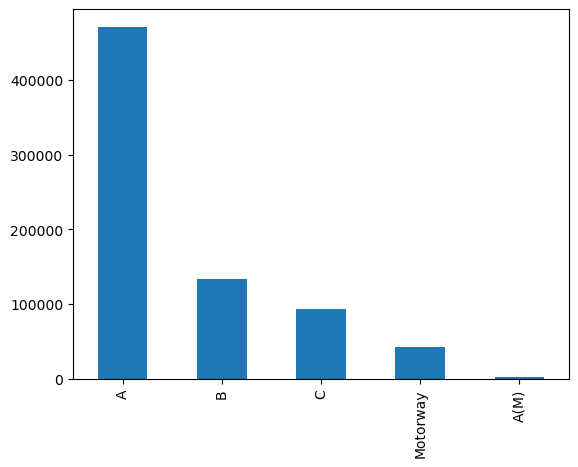

In [14]:
df['1st_Road_Class'].value_counts().plot.bar()

<Axes: >

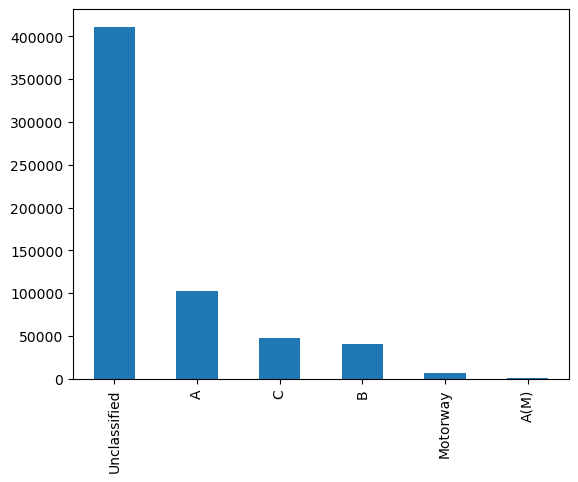

In [15]:
df['2nd_Road_Class'].value_counts().plot.bar()

# Impute Missing Values
### Impute Categorical Features

In [25]:
from sklearn.impute import SimpleImputer
cat_impute = SimpleImputer(strategy='constant', fill_value = 'missing')

In [26]:
categorical_features = df.select_dtypes(include = ['object']).columns.values

In [27]:
df[categorical_features].head()

,Accident_Index,1st_Road_Class,2nd_Road_Class,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,...,Local_Authority_(Highway),LSOA_of_Accident_Location,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Time,Urban_or_Rural_Area,Weather_Conditions,InScotland
0,200501BS00001,A,NaN,Serious,None,04/01/2005,Tuesday,Data missing or out of range,Not at junction or within 20 metres,NaN,...,Kensington and Chelsea,E01002849,Metropolitan Police,Wet or damp,Single carriageway,None,17:42,Urban,Raining no high winds,No
1,200501BS00002,B,C,Slight,None,05/01/2005,Wednesday,Auto traffic signal,Crossroads,Darkness - lights lit,...,Kensington and Chelsea,E01002909,Metropolitan Police,Dry,Dual carriageway,None,17:36,Urban,Fine no high winds,No
2,200501BS00003,C,NaN,Slight,None,06/01/2005,Thursday,Data missing or out of range,Not at junction or within 20 metres,Darkness - lights lit,...,Kensington and Chelsea,E01002857,Metropolitan Police,Dry,Single carriageway,None,00:15,Urban,Fine no high winds,No
3,200501BS00004,A,NaN,Slight,None,07/01/2005,Friday,Data missing or out of range,Not at junction or within 20 metres,NaN,...,Kensington and Chelsea,E01002840,Metropolitan Police,Dry,Single carriageway,None,10:35,Urban,Fine no high winds,No
4,200501BS00005,NaN,NaN,Slight,None,10/01/2005,Monday,Data missing or out of range,Not at junction or within 20 metres,Darkness - lighting unknown,...,Kensington and Chelsea,E01002863,Metropolitan Police,Wet or damp,Single carriageway,None,21:13,Urban,Fine no high winds,No


In [28]:
cat_impute.fit(df[categorical_features])

SimpleImputer(fill_value='missing', strategy='constant')

## Transform and apply 

In [29]:
df[categorical_features] = cat_impute.transform(df[categorical_features])

In [30]:
df[categorical_features].isnull().sum()

Accident_Index                0
1st_Road_Class                0
2nd_Road_Class                0
Accident_Severity             0
Carriageway_Hazards           0
Date                          0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Light_Conditions              0
Local_Authority_(District)    0
Local_Authority_(Highway)     0
LSOA_of_Accident_Location     0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Special_Conditions_at_Site    0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
InScotland                    0
dtype: int64

## Impute numerical features

In [31]:
numerical_features = df.select_dtypes(include = ['int64','float64']).columns.values
numerical_features

array(['1st_Road_Number', '2nd_Road_Number',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Latitude',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Speed_limit', 'Year'],
      dtype=object)

In [32]:
df[numerical_features].isnull().sum()

1st_Road_Number                                    2
2nd_Road_Number                                10803
Did_Police_Officer_Attend_Scene_of_Accident      269
Latitude                                         111
Location_Easting_OSGR                            111
Location_Northing_OSGR                           111
Longitude                                        112
Number_of_Casualties                               0
Number_of_Vehicles                                 0
Pedestrian_Crossing-Human_Control                 21
Pedestrian_Crossing-Physical_Facilities           37
Speed_limit                                        0
Year                                               0
dtype: int64

In [33]:
from sklearn.impute import KNNImputer
num_impute = KNNImputer()

In [34]:
df[numerical_features].head(10)

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Year
0,3218.0,0.0,1.0,51.489096,525680.0,178240.0,-0.191170,1,1,0.0,1.0,30,2005
1,450.0,0.0,1.0,51.520075,524170.0,181650.0,-0.211708,1,1,0.0,5.0,30,2005
2,0.0,0.0,1.0,51.525301,524520.0,182240.0,-0.206458,1,2,0.0,0.0,30,2005
3,3220.0,0.0,1.0,51.482442,526900.0,177530.0,-0.173862,1,1,0.0,0.0,30,2005
4,0.0,0.0,1.0,51.495752,528060.0,179040.0,-0.156618,1,1,0.0,0.0,30,2005
5,0.0,0.0,1.0,51.515540,524770.0,181160.0,-0.203238,1,2,0.0,0.0,30,2005
6,0.0,0.0,1.0,51.512695,524220.0,180830.0,-0.211277,1,2,0.0,0.0,30,2005
7,315.0,0.0,1.0,51.502260,525890.0,179710.0,-0.187623,2,1,0.0,0.0,30,2005
8,3212.0,304.0,1.0,51.483420,527350.0,177650.0,-0.167342,2,2,0.0,5.0,30,2005
9,450.0,0.0,1.0,51.512443,524550.0,180810.0,-0.206531,5,2,0.0,8.0,30,2005


In [35]:
num_impute.fit(df[numerical_features])

KNNImputer()

## Transform/Apply

In [36]:
df[numerical_features] = num_impute.transform(df[numerical_features])

In [38]:
df[numerical_features].head(100)

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Year
0,3218.0,0.0,1.0,51.489096,525680.0,178240.0,-0.191170,1.0,1.0,0.0,1.0,30.0,2005.0
1,450.0,0.0,1.0,51.520075,524170.0,181650.0,-0.211708,1.0,1.0,0.0,5.0,30.0,2005.0
2,0.0,0.0,1.0,51.525301,524520.0,182240.0,-0.206458,1.0,2.0,0.0,0.0,30.0,2005.0
3,3220.0,0.0,1.0,51.482442,526900.0,177530.0,-0.173862,1.0,1.0,0.0,0.0,30.0,2005.0
4,0.0,0.0,1.0,51.495752,528060.0,179040.0,-0.156618,1.0,1.0,0.0,0.0,30.0,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,450.0,0.0,1.0,51.514716,524430.0,181060.0,-0.208171,1.0,2.0,0.0,0.0,30.0,2005.0
96,3220.0,0.0,1.0,51.502577,524050.0,179700.0,-0.214123,1.0,2.0,0.0,5.0,30.0,2005.0
97,3220.0,308.0,1.0,51.483253,526090.0,177600.0,-0.185496,1.0,3.0,0.0,5.0,30.0,2005.0
98,4204.0,0.0,1.0,51.507588,525370.0,180290.0,-0.194905,2.0,3.0,0.0,1.0,30.0,2005.0


In [39]:
df[numerical_features].isnull().sum()

1st_Road_Number                                0
2nd_Road_Number                                0
Did_Police_Officer_Attend_Scene_of_Accident    0
Latitude                                       0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Number_of_Casualties                           0
Number_of_Vehicles                             0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Speed_limit                                    0
Year                                           0
dtype: int64

In [40]:
null=df.isnull().sum()

In [41]:
print(null)

Accident_Index                                 0
1st_Road_Class                                 0
1st_Road_Number                                0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Accident_Severity                              0
Carriageway_Hazards                            0
Date                                           0
Day_of_Week                                    0
Did_Police_Officer_Attend_Scene_of_Accident    0
Junction_Control                               0
Junction_Detail                                0
Latitude                                       0
Light_Conditions                               0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
LSOA_of_Accident_Location                      0
Number_of_Casualties

# Correlation And Hypothesis Testing

## Continous variables-

In [60]:
df.corr(method="pearson")

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Year
1st_Road_Number,1.000000,0.186871,0.005398,0.043517,-0.079663,0.042640,-0.077718,0.008524,-0.009510,0.001536,0.037943,-0.065759,0.006728
2nd_Road_Number,0.186871,1.000000,0.029031,0.003821,0.012902,0.003274,0.014064,0.000692,0.026205,0.002317,0.091748,-0.056650,0.003729
Did_Police_Officer_Attend_Scene_of_Accident,0.005398,0.029031,1.000000,-0.011806,0.002758,-0.012019,0.003288,-0.109042,-0.027787,0.009812,0.007968,-0.161711,0.000360
Latitude,0.043517,0.003821,-0.011806,1.000000,-0.394573,0.999972,-0.405056,0.033777,-0.042118,0.043188,0.003154,0.035795,-0.038393
Location_Easting_OSGR,-0.079663,0.012902,0.002758,-0.394573,1.000000,-0.392579,0.999345,-0.040179,0.017834,-0.025995,0.050429,-0.056295,0.038994
Location_Northing_OSGR,0.042640,0.003274,-0.012019,0.999972,-0.392579,1.000000,-0.403160,0.033622,-0.042346,0.043244,0.003059,0.036125,-0.038460
Longitude,-0.077718,0.014064,0.003288,-0.405056,0.999345,-0.403160,1.000000,-0.039015,0.019166,-0.027246,0.049178,-0.055326,0.040129
Number_of_Casualties,0.008524,0.000692,-0.109042,0.033777,-0.040179,0.033622,-0.039015,1.000000,0.226377,-0.008705,-0.025636,0.136949,-0.004314
Number_of_Vehicles,-0.009510,0.026205,-0.027787,-0.042118,0.017834,-0.042346,0.019166,0.226377,1.000000,-0.017950,-0.049185,0.082855,-0.007507
Pedestrian_Crossing-Human_Control,0.001536,0.002317,0.009812,0.043188,-0.025995,0.043244,-0.027246,-0.008705,-0.017950,1.000000,0.100513,-0.040336,-0.001691


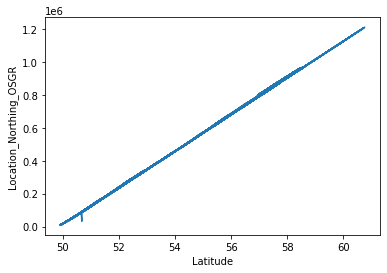

In [26]:
first_sample=df['Latitude']
second_sample=df['Location_Northing_OSGR']

plt.plot(first_sample,second_sample)
plt.xlabel('Latitude')
plt.ylabel('Location_Northing_OSGR')
plt.show()

### Pearson correlation test for continous variable

##### H0=The null hypothesis states that there is no significant association between the variables. if p < 0.05 we reject null hypothesis
##### H1= The alternative hypothesis states that there is a significant association between the variable 

In [63]:
from scipy.stats import pearsonr

x = df['Latitude']
y = df['Location_Northing_OSGR']

corr_coeff, p_value = pearsonr(x, y)
print("Correlation coefficient:", corr_coeff)
print("p-value:", p_value)

Correlation coefficient: 0.9999721776099723
p-value: 0.0


### Pearson correlation between Longitude and Location_Easting_OSGR

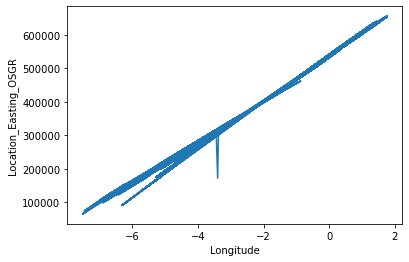

In [25]:
first_sample2=df['Longitude']
second_sample2=df['Location_Easting_OSGR']

plt.plot(first_sample2,second_sample2)
plt.xlabel('Longitude')
plt.ylabel('Location_Easting_OSGR')
plt.show()

In [65]:
from scipy.stats import pearsonr

x = df['Longitude']
y = df['Location_Easting_OSGR']

corr_coeff, p_value = pearsonr(x, y)
print("Correlation coefficient:", corr_coeff)
print("p-value:", p_value)

Correlation coefficient: 0.9993449438863554
p-value: 0.0


Given the Correlation coefficient: 0.9993449438863554 , the p-value of 0.0, , it can be concluded that there is a highly significant association between the continous variables under consideration. The extremely small p-value suggests that the observed data is highly unlikely to occur by chance alone, indicating a strong evidence against the null hypothesis of no association.

### Pearson test between Number_of_Casualties and Number_of_Vehicles

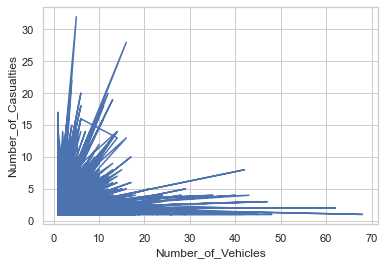

In [271]:
first_sample=df['Number_of_Casualties']
second_sample=df['Number_of_Vehicles']

plt.plot(first_sample,second_sample)
plt.xlabel('Number_of_Vehicles')
plt.ylabel('Number_of_Casualties')
plt.show()

In [222]:
from scipy.stats import pearsonr

x = df['Number_of_Casualties']
y = df['Number_of_Vehicles']

corr_coeff, p_value = pearsonr(x, y)
print("Correlation coefficient:", corr_coeff)
print("p-value:", p_value)

Correlation coefficient: 0.22637651788940363
p-value: 0.0


The correlation coefficient measures the strength and direction of the linear relationship between two variables. In this case, the coefficient is positive, indicating a positive correlation between the variables.

However, it's important to note that a p-value of 0.0 is highly unlikely and is typically rounded down to 0 for practical purposes. A p-value of 0 indicates that the observed correlation is statistically significant and is unlikely to have occurred by chance alone. It suggests strong evidence to reject the null hypothesis that there is no correlation between the variables.

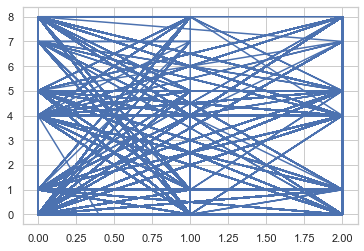

In [268]:
first_sample=df['Pedestrian_Crossing-Human_Control']
second_sample=df['Pedestrian_Crossing-Physical_Facilities']

plt.plot(first_sample,second_sample)
plt.show()

In [269]:
from scipy.stats import pearsonr

x = df['Pedestrian_Crossing-Human_Control']
y = df['Pedestrian_Crossing-Physical_Facilities']

corr_coeff, p_value = pearsonr(x, y)
print("Correlation coefficient:", corr_coeff)
print("p-value:", p_value)

Correlation coefficient: 0.10051279343437212
p-value: 0.0


The correlation coefficient measures the strength and direction of the linear relationship between two variables. In this case, the correlation coefficient is 0.10051279343437212. Since the value is positive, it indicates a positive relationship between the variables. However, the magnitude of the correlation coefficient (0.1) suggests a relatively weak relationship

The p-value of 0.0 indicates that the observed correlation is statistically significant.

A p-value of 0.0 means that the probability of observing such a strong correlation by chance alone is extremely low

It's important to note that while the correlation is statistically significant, the effect size (as indicated by the magnitude of the correlation coefficient) suggests a weak relationship. This means that although there is a statistical association between the variables, the strength of the relationship is not very strong.

# Chi- Squared Test for Categorical variable

 Null hypothesis (H₀): The null hypothesis states that there is no association between the variables.
 
 
 Alternative hypothesis (H₁):The alternative hypothesis states that there is a significant association between the variable
 
 If P-value is less than 0.05 we reject the Null Hypothesis




## Variable Taken '1st_Road_Class' and 'Accident_Severity'

#### Assumption- independent observation, size in each box of contingency table is >25

In [225]:
contingency_data = pd.crosstab(df['1st_Road_Class'],df['Accident_Severity'],margins = False)

In [226]:
contingency_data

Accident_Severity,Fatal,Serious,Slight
1st_Road_Class,,,
A,8042,62952,399860
A(M),57,323,2293
B,2065,18982,112132
C,1227,12762,79994
Motorway,796,4146,37355


A:-main recommended route these can be  single carriageway or dual carriageway. The primary road network is fully connected, meaning you can reach any part from any other without leaving the network.

A(m):-Some A Roads also have primary status (e.g., A1(M), A3(M)), which indicates higher importance and often includes sections built to motorway standards.

B:- Regional in nature and used to connect areas of lesser importance. 

C:-C roads are used as local authority designations for routes within their area for administrative purposes. These routes are not shown on small-scale road maps, but have occasionally been known to appear on road signs.

Motorway:- Motorways are high-capacity roads designed for fast and uninterrupted traffic flow. 


<AxesSubplot:xlabel='1st_Road_Class'>

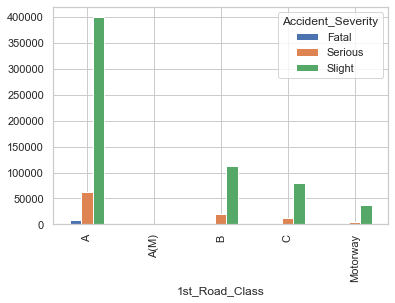

In [308]:
sns.set(style='whitegrid')
contingency_data.plot(kind='bar')



In [73]:
from scipy.stats import chi2_contingency

In [76]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data)



In [84]:
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 655.6782749718087
P-value: 2.477895356038141e-136
Degrees of freedom: 8
Expected frequencies: [[7.72329182e+03 6.28440333e+04 4.00286675e+05]
 [4.38445018e+01 3.56760484e+02 2.27239501e+03]
 [2.18449940e+03 1.77751607e+04 1.13219340e+05]
 [1.54157793e+03 1.25437413e+04 7.98976807e+04]
 [6.93786342e+02 5.64530423e+03 3.59579094e+04]]


Given the chi-square statistic of 655.6782749718087, the p-value of 2.477895356038141e-136, and 8 degrees of freedom, it can be concluded that there is a highly significant association between the categorical variables under consideration. 
The extremely small p-value suggests that the observed data is highly unlikely to occur by chance alone, indicating a strong evidence against the null hypothesis of no association.

### Junction_Control and Junction_Detail

In [87]:
contingency_data1 = pd.crosstab(df['Junction_Control'],df['Junction_Detail'],margins = False)

In [88]:
contingency_data1

Junction_Detail,Crossroads,Data missing or out of range,Mini-roundabout,More than 4 arms (not roundabout),Not at junction or within 20 metres,Other junction,Private drive or entrance,Roundabout,Slip road,T or staggered junction
Junction_Control,,,,,,,,,,
Authorised person,219,0,25,51,3,326,86,299,71,758
Auto traffic sigl,2,0,0,0,11,272,49,1,0,3
Auto traffic signal,48682,0,152,9101,2,3729,345,9343,934,33212
Data missing or out of range,3,10,0,1,352445,313,1069,7,4,19
Give way or uncontrolled,47447,0,9784,6258,51,29504,35501,78835,14472,281132
Not at junction or within 20 metres,0,0,0,0,76916,0,0,0,0,0
Stop sign,2103,0,39,142,0,389,82,447,87,3839


In [89]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data1)



In [90]:
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 1249499.5659626063
P-value: 0.0
Degrees of freedom: 54
Expected frequencies: [[1.72579098e+02 1.75285507e-02 1.75285507e+01 2.72621548e+01
  7.52725045e+02 6.05313440e+01 6.50870143e+01 1.55884907e+02
  2.72884477e+01 5.59095910e+02]
 [3.17365262e+01 3.22342226e-03 3.22342226e+00 5.01338865e+00
  1.38422778e+02 1.11314441e+01 1.19692115e+01 2.86665389e+01
  5.01822378e+00 1.02815244e+02]
 [9.90592757e+03 1.00612736e+00 1.00612736e+03 1.56482989e+03
  4.32059261e+04 3.47445962e+03 3.73595213e+03 8.94769187e+03
  1.56633908e+03 3.20917402e+04]
 [3.32267345e+04 3.37478006e+00 3.37478006e+03 5.24879543e+03
  1.44922505e+05 1.16541280e+04 1.25312333e+04 3.00125940e+04
  5.25385760e+03 1.07642997e+05]
 [4.72277068e+04 4.79683380e+00 4.79683380e+03 7.46051561e+03
  2.05989474e+05 1.65649062e+04 1.78116033e+04 4.26592023e+04
  7.46771086e+03 1.53001250e+05]
 [7.22203152e+03 7.33528837e-01 7.33528837e+02 1.14085740e+03
  3.14997821e+04 2.53309513e+03 2.72373928e+03 6.52341

The chi-square statistic measures the discrepancy between the observed frequencies in the contingency table and the expected frequencies assuming independence between the variables. In this case, the chi-square statistic is extremely large, indicating a significant deviation from the expected frequencies.

the p-value of 0.0 suggests that the observed deviation is highly unlikely to have occurred by chance alone, assuming independence. A p-value of 0.0 means that the probability of obtaining such extreme results or a more significant association between the variables, assuming independence, is essentially impossible.

The degrees of freedom (df) in a chi-square test refer to the number of categories minus 1 for each variable in the contingency table. In this case, with 54 degrees of freedom, it implies that there are 54 categories (cells) in the contingency table for the analysis.

In conclusion, the provided chi-square statistic, p-value, and degrees of freedom indicate a highly significant association between the variables being analyzed.



## Accident Severity and Junction_Details

In [13]:
contingency_data11 = pd.crosstab(df['Accident_Severity'],df['Junction_Detail'],margins = False)

In [14]:
contingency_data11

Junction_Detail,Crossroads,Data missing or out of range,Mini-roundabout,More than 4 arms (not roundabout),Not at junction or within 20 metres,Other junction,Private drive or entrance,Roundabout,Slip road,T or staggered junction
Accident_Severity,,,,,,,,,,
Fatal,804,0,38,104,9295,330,373,304,244,3008
Serious,11709,0,862,1751,65976,3876,4824,6957,1649,40588
Slight,85943,10,9100,13698,354157,30327,31935,81671,13675,275367


<AxesSubplot:xlabel='Accident_Severity'>

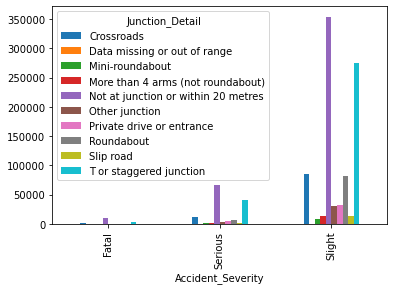

In [15]:
contingency_data11.plot(kind='bar')

In [16]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data11)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 8555.750929603008
P-value: 0.0
Degrees of freedom: 18
Expected frequencies: [[1.36147820e+03 1.38282908e-01 1.38282908e+02 2.15071406e+02
  5.93825525e+03 4.77532365e+02 5.13472093e+02 1.22977756e+03
  2.15278831e+02 4.41071311e+03]
 [1.29755445e+04 1.31790287e+00 1.31790287e+03 2.04973433e+03
  5.65944393e+04 4.55111397e+03 4.89363693e+03 1.17203738e+04
  2.05171119e+03 4.20362253e+04]
 [8.41189773e+04 8.54381422e+00 8.54381422e+03 1.32881943e+04
  3.66895305e+05 2.95043537e+04 3.17248910e+04 7.59818487e+04
  1.33010100e+04 2.72516062e+05]]


### Junction_Control and Light_Conditions

In [92]:
contingency_data2 = pd.crosstab(df['Junction_Control'],df['Light_Conditions'],margins = False)

In [93]:
contingency_data2

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Junction_Control,,,,,
Authorised person,21,308,8,38,1459
Auto traffic sigl,6,76,1,4,251
Auto traffic signal,722,30953,371,188,72606
Data missing or out of range,3717,60052,1533,37980,250057
Give way or uncontrolled,4324,104874,2118,12592,378189
Not at junction or within 20 metres,515,10409,245,9775,55972
Stop sign,67,1300,40,218,5502


In [94]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data2)

In [95]:
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 45730.217353319174
P-value: 0.0
Degrees of freedom: 24
Expected frequencies: [[1.64246496e+01 3.64475803e+02 7.56389114e+00 1.06544662e+02
  1.33899099e+03]
 [3.02700740e+00 6.71716584e+01 1.39399957e+00 1.96358210e+01
  2.46771514e+02]
 [9.38909632e+02 2.08351381e+04 4.32387321e+02 6.09059017e+03
  7.65429748e+04]
 [3.16437801e+03 7.02200196e+04 1.45726158e+03 2.05269271e+04
  2.57970414e+05]
 [4.49660158e+03 9.97831011e+04 2.07077811e+03 2.91688960e+04
  3.66577623e+05]
 [6.88832252e+02 1.52857257e+04 3.17221511e+02 4.46836926e+03
  5.61558513e+04]
 [6.38268690e+01 1.41636808e+03 2.93935944e+01 4.14036972e+02
  5.20337449e+03]]


## LSOA of Accident location and accident severity

In [214]:
contingency_data3 = pd.crosstab(df['LSOA_of_Accident_Location'],df['Accident_Severity'],margins = False)

In [215]:
contingency_data3

Accident_Severity,Fatal,Serious,Slight
LSOA_of_Accident_Location,,,
E01000001,1,6,54
E01000002,0,1,24
E01000003,0,0,1
E01000004,7,246,1480
E01000005,0,12,104
...,...,...,...
W01001892,0,0,1
W01001893,0,7,111
W01001894,0,0,9


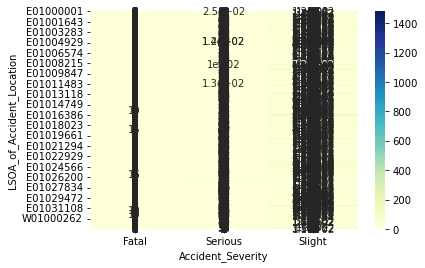

In [217]:
# Plot the contingency table as a heatmap
sns.heatmap(contingency_data3, annot=True, cmap='YlGnBu')
plt.show()


<AxesSubplot:xlabel='LSOA_of_Accident_Location'>

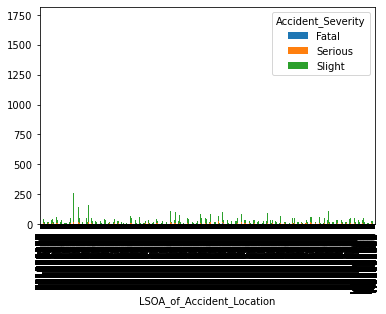

In [218]:
contingency_data3.plot(kind='bar', stacked=True)

In [220]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data3)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 87841.92562292848
P-value: 0.0
Degrees of freedom: 68450
Expected frequencies: [[8.17238926e-01 7.89764458e+00 5.22851165e+01]
 [3.34933986e-01 3.23673958e+00 2.14283264e+01]
 [1.33973594e-02 1.29469583e-01 8.57133057e-01]
 ...
 [1.20576235e-01 1.16522625e+00 7.71419752e+00]
 [3.21536626e-01 3.10727000e+00 2.05711934e+01]
 [9.37815160e-02 9.06287083e-01 5.99993140e+00]]


Therefore, a greater chi-square statistic suggests a more substantial difference between the observed and expected frequencies, indicating a stronger association or relationship between the variables being analyzed.

LSOA_of_Accident_Location refers to the specific Lower Layer Super Output Area where an accident occurred. It is a variable or column in a dataset that contains information about the geographical location of accidents, specifically denoting the LSOA.

The LSOA_of_Accident_Location column may provide insights into the spatial distribution of accidents and can be used for geographical analysis, such as identifying high-risk areas or studying patterns of accidents in different regions.

### Road surface Condition and road type

In [228]:
contingency_data4 = pd.crosstab(df['Road_Surface_Conditions'],df['Road_Type'],margins = False)

In [229]:
contingency_data4

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road
Road_Surface_Conditions,,,,,
Dry,106295,16503,48340,528369,7406
Flood over 3cm. deep,444,5,27,963,10
Frost or ice,2984,256,1010,19282,217
Snow,1145,94,272,5823,77
Wet or damp,47547,5276,19139,225364,3284


<AxesSubplot:xlabel='Road_Surface_Conditions'>

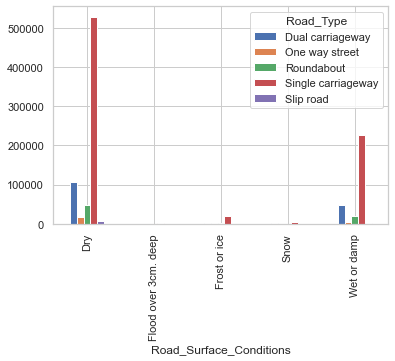

In [298]:
contingency_data4.plot(kind='bar')

In [235]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data4)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 1524.0677289208202
P-value: 0.0
Degrees of freedom: 16
Expected frequencies: [[1.07664818e+05 1.50431026e+04 4.67509234e+04 5.29982218e+05
  7.47193772e+03]
 [2.20686735e+02 3.08347075e+01 9.58280411e+01 1.08633486e+03
  1.53156580e+01]
 [3.61703883e+03 5.05378515e+02 1.57061432e+03 1.78049459e+04
  2.51022472e+02]
 [1.12871594e+03 1.57706016e+02 4.90118435e+02 5.55612673e+03
  7.83328789e+01]
 [4.57837401e+04 6.39697821e+03 1.98805158e+04 2.25371375e+05
  3.17739127e+03]]


The chi-square test is used to determine if there is a significant association between two categorical variables. The test compares the observed frequencies (actual data) with the expected frequencies (what would be expected if there were no association).

In a chi-square test, the observed frequencies are the actual counts or frequencies of occurrences in each category or cell of a contingency table. These are the values obtained from the data you have collected or observed.

A higher chi-square value indicates a larger discrepancy and suggests a stronger association between the variables.

The p-value associated with the chi-square test indicates the probability of observing such a large discrepancy (or larger) under the null hypothesis of independence. A low p-value suggests that the observed association between the variables is statistically significant and not likely due to chance.



### Accident_Severity and Road_Surface_Conditions

In [288]:
contingency_data5 = pd.crosstab(df['Accident_Severity'],df['Road_Surface_Conditions'],margins = False)

In [289]:
contingency_data5

Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp
Accident_Severity,,,,,
Fatal,9657,35,248,53,4500
Serious,96228,202,2660,728,38256
Slight,606485,1221,20949,6670,259494


<AxesSubplot:xlabel='Accident_Severity'>

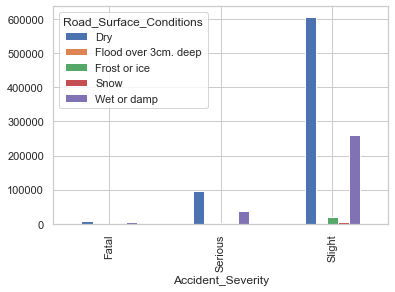

In [292]:
contingency_data5.plot(kind='bar')

In [290]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data5)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 389.99214644716164
P-value: 2.5876545473355166e-79
Degrees of freedom: 8
Expected frequencies: [[9.85728128e+03 2.01747913e+01 3.30116596e+02 1.03101763e+02
  4.18232557e+03]
 [9.39097672e+04 1.92204108e+02 3.14500234e+03 9.82244725e+02
  3.98447817e+04]
 [6.08602952e+05 1.24562110e+03 2.03818811e+04 6.36565351e+03
  2.58222893e+05]]


### Accident_Severity and Road_Type

In [280]:
contingency_data6 = pd.crosstab(df['Accident_Severity'],df['Road_Type'],margins = False)

In [281]:
contingency_data6

Road_Type,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road
Accident_Severity,,,,,
Fatal,3012,156,239,10948,91
Serious,18666,2681,5614,109525,944
Slight,136858,19343,63078,660186,9968


<AxesSubplot:xlabel='Accident_Severity'>

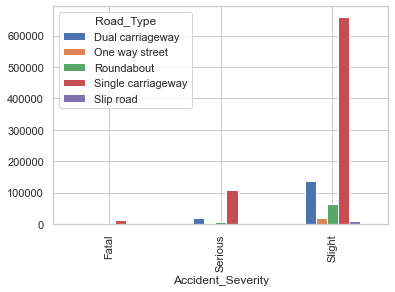

In [286]:
contingency_data6.plot(kind='bar')

In [252]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data6)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 6646.0653434408205
P-value: 0.0
Degrees of freedom: 14
Expected frequencies: [[4.93917877e+03 3.02828798e+05 2.20466516e+03 9.65060288e+03
  5.35533210e+03 4.57247554e+04 4.67899184e+02 3.11276856e+03]
 [7.52191358e-01 4.61180320e+01 3.35750163e-01 1.46969778e+00
  8.15567669e-01 6.96345839e+00 7.12567289e-02 4.74045933e-01]
 [8.61406903e+03 5.28142084e+05 3.84499909e+03 1.68309274e+04
  9.33985233e+03 7.97452811e+04 8.16029559e+02 5.42875739e+03]]


### Urban or Rural Area and Weather conditions

In [250]:
contingency_data7 = pd.crosstab(df['Urban_or_Rural_Area'],df['Weather_Conditions'],margins = False)

In [251]:
contingency_data7

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds
Urban_or_Rural_Area,,,,,,,,
Rural,6373,291029,3987,11170,7241,49426,852,4206
Unallocated,2,42,0,1,0,12,0,0
Urban,7179,539946,2063,15312,7455,76039,432,4336


<AxesSubplot:xlabel='Urban_or_Rural_Area'>

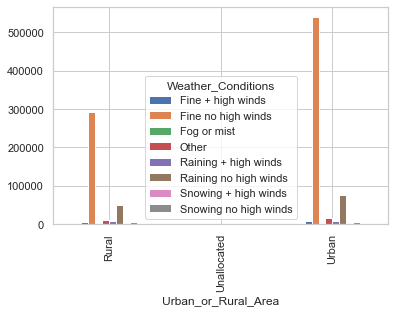

In [293]:
contingency_data7.plot(kind='bar')

In [253]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data7)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 6646.0653434408205
P-value: 0.0
Degrees of freedom: 14
Expected frequencies: [[4.93917877e+03 3.02828798e+05 2.20466516e+03 9.65060288e+03
  5.35533210e+03 4.57247554e+04 4.67899184e+02 3.11276856e+03]
 [7.52191358e-01 4.61180320e+01 3.35750163e-01 1.46969778e+00
  8.15567669e-01 6.96345839e+00 7.12567289e-02 4.74045933e-01]
 [8.61406903e+03 5.28142084e+05 3.84499909e+03 1.68309274e+04
  9.33985233e+03 7.97452811e+04 8.16029559e+02 5.42875739e+03]]


## Road_Type and Urban_or_Rural_Area

In [283]:
contingency_data8 = pd.crosstab(df['Road_Type'],df['Urban_or_Rural_Area'],margins = False)

In [284]:
contingency_data8

Urban_or_Rural_Area,Rural,Unallocated,Urban
Road_Type,,,
Dual carriageway,77855,4,80663
One way street,2020,3,20154
Roundabout,24384,9,44538
Single carriageway,267542,40,513016
Slip road,6645,0,4358


<AxesSubplot:xlabel='Road_Type'>

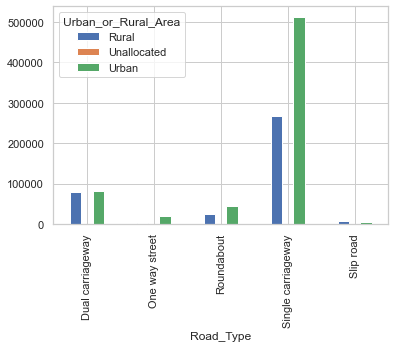

In [287]:
contingency_data8.plot(kind='bar')

In [291]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data8)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 22516.646749950247
P-value: 0.0
Degrees of freedom: 8
Expected frequencies: [[5.76164336e+04 8.52570851e+00 1.00897041e+05]
 [8.06045627e+03 1.19273437e+00 1.41153510e+04]
 [2.50536732e+04 3.70728109e+00 4.38736195e+04]
 [2.83716285e+05 4.19825072e+01 4.96839733e+05]
 [3.99915229e+03 5.91768781e-01 7.00325594e+03]]


the statistical significance of the association between the "Road_Type" and "Urban_or_Rural_Area" variables. The p-value indicates the probability of observing the data if the two variables were independent. If the p-value is below a chosen significance level (e.g., 0.05), it suggests evidence against the null hypothesis of independence.

The expected frequencies table shows the expected counts for each cell based on the assumption of independence between the variables.

## Road_Surface_Conditions and Weather conditions

In [295]:
contingency_data9 = pd.crosstab(df['Road_Surface_Conditions'],df['Weather_Conditions'],margins = False)

In [296]:
contingency_data9

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds
Road_Surface_Conditions,,,,,,,,
Dry,7857,681527,775,4375,111,834,14,86
Flood over 3cm. deep,21,155,3,26,450,770,4,7
Frost or ice,246,13727,1041,5981,85,524,229,1724
Snow,24,1203,27,472,25,150,783,4701
Wet or damp,5400,134287,4203,15623,14026,123198,256,2024


<AxesSubplot:xlabel='Road_Surface_Conditions'>

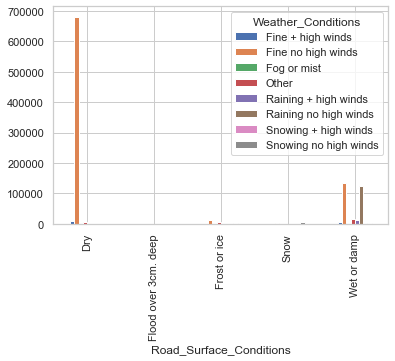

In [297]:
contingency_data9.plot(kind='bar')

In [299]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data9)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 927874.6246621312
P-value: 0.0
Degrees of freedom: 28
Expected frequencies: [[9.17618585e+03 5.62775587e+05 4.09704371e+03 1.79331173e+04
  9.95441419e+03 8.49860567e+04 8.71019708e+02 5.78557570e+03]
 [1.89439343e+01 1.16183172e+03 8.45821218e+00 3.70223316e+01
  2.05505612e+01 1.75450923e+02 1.79819158e+00 1.19441310e+01]
 [3.10767591e+02 1.90593800e+04 1.38753555e+02 6.07336397e+02
  3.37123656e+02 2.87820152e+03 2.94986066e+01 1.95938645e+02]
 [9.74240633e+01 5.97501895e+03 4.34985355e+01 1.90396880e+02
  1.05686556e+02 9.02301577e+02 9.24766352e+00 6.14257712e+01]
 [3.94467856e+03 2.41927182e+05 1.76124598e+03 7.70912711e+03
  4.27922503e+03 3.65339893e+04 3.74435830e+02 2.48711575e+03]]


The chi-square statistic measures the discrepancy between the observed frequencies and the expected frequencies under the assumption of independence. In this case, the chi-square statistic is a large value of 927874.6246621312.

The p-value associated with the chi-square statistic is 0.0, which indicates that the probability of observing such a large chi-square value, or an even larger value, under the assumption of independence is extremely low.

The degrees of freedom for this test are 28, which is calculated as the number of categories (or levels) minus 1.

In conclusion, the chi-square test results suggest a strong rejection of the null hypothesis of independence. This means that there is a significant association or relationship between the variables being analyzed

## Accident_Severity and Weather_Conditions

In [301]:
contingency_data10 = pd.crosstab(df['Accident_Severity'],df['Weather_Conditions'],margins = False)

In [302]:
contingency_data10

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds
Accident_Severity,,,,,,,,
Fatal,277,11952,135,249,215,1396,10,59
Serious,1966,113329,819,2725,1904,14685,160,785
Slight,11311,705802,5097,23512,12578,109403,1116,7698


<AxesSubplot:xlabel='Accident_Severity'>

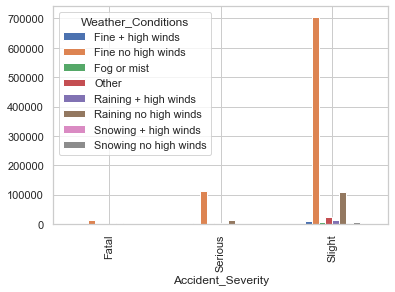

In [303]:
contingency_data10.plot(kind='bar')

In [304]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data10)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 979.5889244241837
P-value: 3.741626323729214e-200
Degrees of freedom: 14
Expected frequencies: [[1.88600592e+02 1.15643165e+04 8.41981838e+01 3.68546206e+02
  2.04505157e+02 1.74607914e+03 1.78943752e+01 1.18859839e+02]
 [1.79948426e+03 1.10337965e+05 8.03355413e+02 3.51638927e+03
  1.95123360e+03 1.66597671e+04 1.70734599e+02 1.13407072e+03]
 [1.15659151e+04 7.09180718e+05 5.16344640e+03 2.26010645e+04
  1.25412612e+04 1.07078154e+05 1.09737103e+03 7.28906944e+03]]


## Accident severity and Urban and Rural Roads

In [17]:
contingency_data12 = pd.crosstab(df['Accident_Severity'],df['Urban_or_Rural_Area'],margins = False)

In [19]:
contingency_data12

Urban_or_Rural_Area,Rural,Unallocated,Urban,missing
Accident_Severity,,,,
Fatal,9383,0,5117,0
Serious,58679,8,79494,11
Slight,312488,50,583271,74


<AxesSubplot:xlabel='Accident_Severity'>

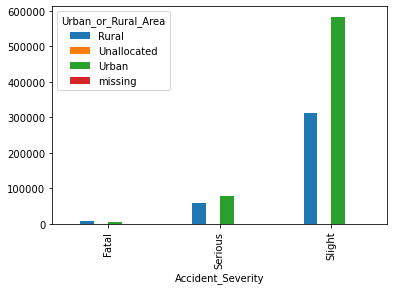

In [20]:
contingency_data12.plot(kind='bar')

In [21]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_data12)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 8112.959095521162
P-value: 0.0
Degrees of freedom: 6
Expected frequencies: [[5.26235605e+03 8.02040865e-01 9.23566650e+03 1.17540472e+00]
 [5.01527936e+04 7.64383664e+00 8.80203603e+04 1.12021744e+01]
 [3.25134850e+05 4.95541225e+01 5.70625973e+05 7.26224209e+01]]


# Outlier Treatment

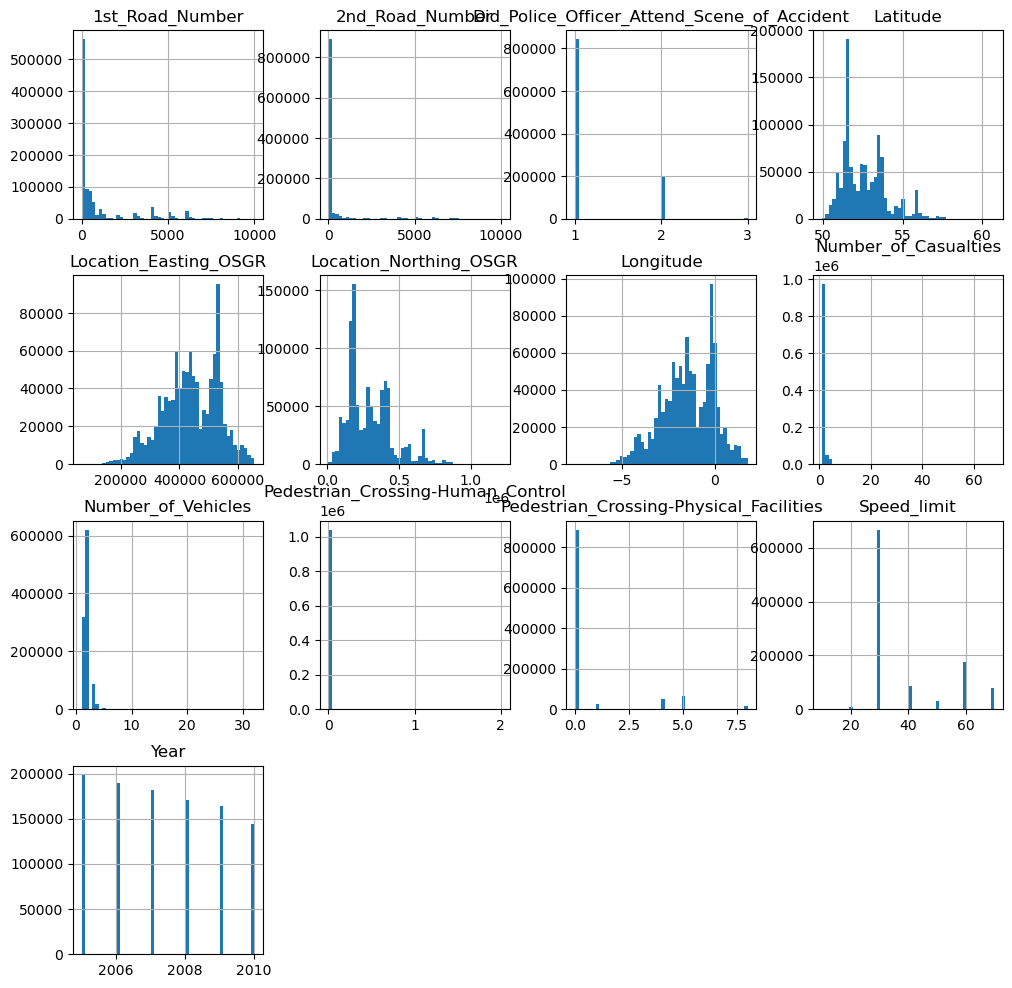

In [158]:
df.select_dtypes(include='number').hist(bins=50, figsize=(12, 12))

plt.show()

## Box plot for outlier detection

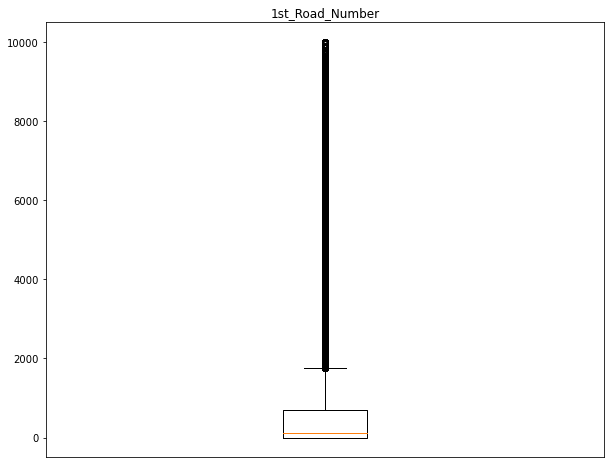

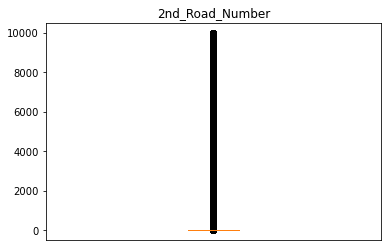

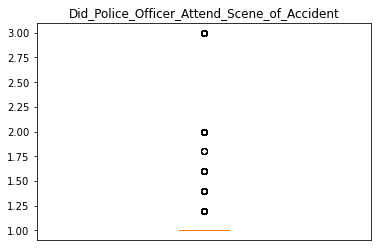

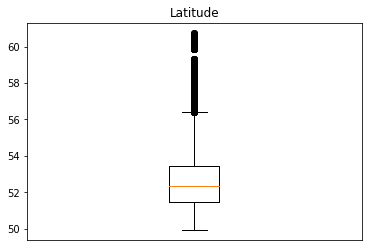

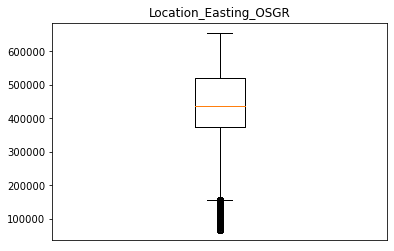

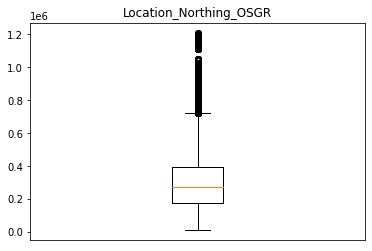

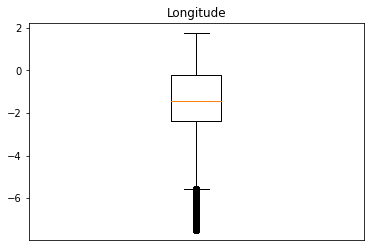

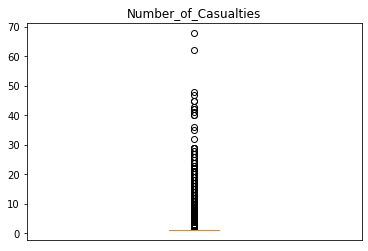

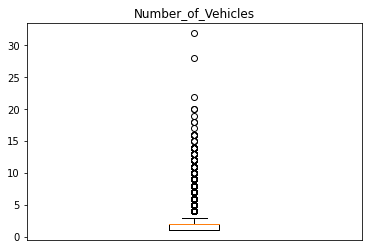

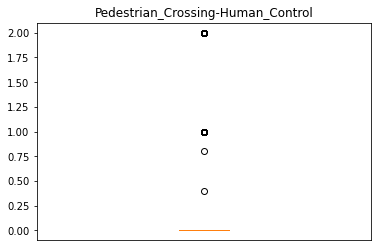

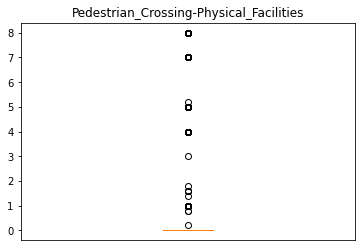

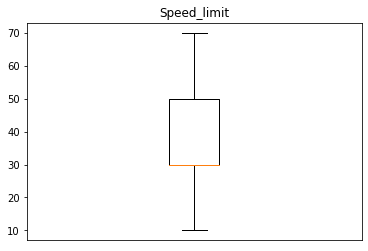

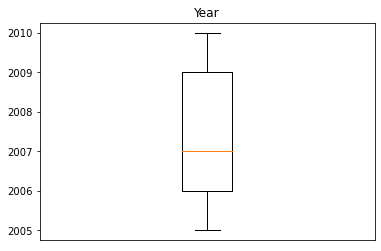

In [78]:
num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(10, 8))

for col in num_cols:
    plt.boxplot(df[col])
    plt.title(col)
    plt.xticks([])
    plt.show()
    

## Computing the one and 99th percentile of data and Treating the Outliers By Winsorize Method

### Number_of_vehicles

{'whiskers': [<matplotlib.lines.Line2D at 0x168fb5570>,
 'caps': [<matplotlib.lines.Line2D at 0x168fb5ab0>,
 'boxes': [<matplotlib.lines.Line2D at 0x168fb52d0>],
 'medians': [<matplotlib.lines.Line2D at 0x168fb5ff0>],
 'fliers': [<matplotlib.lines.Line2D at 0x168fb6290>],
 'means': []}

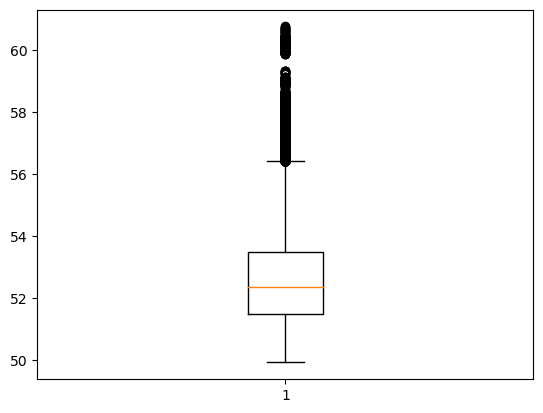

In [160]:
plt.boxplot(df['Latitude'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1690380a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1690384c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16900fdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x169038a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x169038ca0>],
 'means': []}

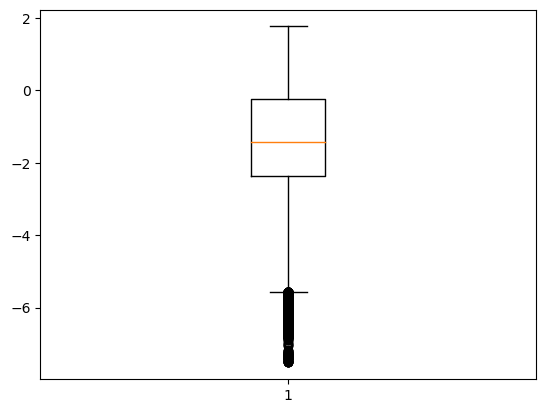

In [161]:
plt.boxplot(df['Longitude'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16908a410>,
 'caps': [<matplotlib.lines.Line2D at 0x16908a950>,
 'boxes': [<matplotlib.lines.Line2D at 0x168fe7490>],
 'medians': [<matplotlib.lines.Line2D at 0x16908ae90>],
 'fliers': [<matplotlib.lines.Line2D at 0x16908b130>],
 'means': []}

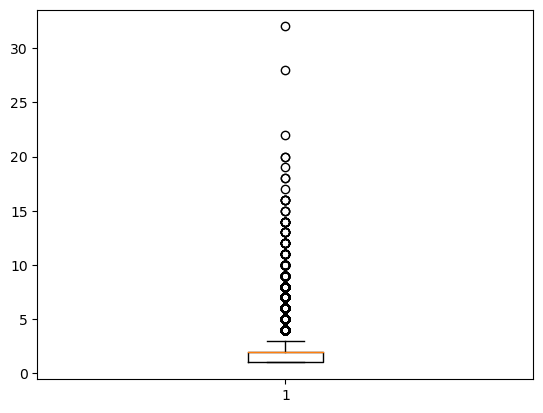

In [162]:
plt.boxplot(df['Number_of_Vehicles'])

In [159]:
Q1 = df['Number_of_Vehicles'].quantile(0.25)
Q2 = df['Number_of_Vehicles'].quantile(0.75)
IQR = Q2-Q1

lower = Q1 - (1.5 * IQR)
upper = Q2 + (1.5 * IQR)
print("one percentile:",Q1)
print("99th percentile:",Q2)
print(lower)
print(upper)

one percentile: 1.0
99th percentile: 2.0
-0.5
3.5


In [72]:
df['Number_of_Vehicles'].value_counts()

2.0     620933
1.0     317551
3.0      85795
4.0      18126
5.0       4036
6.0       1250
7.0        461
8.0        222
9.0         94
10.0        39
11.0        19
12.0        13
14.0        11
13.0         8
16.0         5
15.0         3
18.0         2
20.0         2
17.0         1
22.0         1
28.0         1
32.0         1
19.0         1
Name: Number_of_Vehicles, dtype: int64

In [260]:
df.Number_of_Vehicles.describe()

count    1.048575e+06
mean     1.835030e+00
std      7.181454e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      3.200000e+01
Name: Number_of_Vehicles, dtype: float64

In [136]:
### Winsorize at the 1th and 99th percentiles

df['Number_of_Vehicles'] = mstats.winsorize(df['Number_of_Vehicles'], limits=[0.01, 0.01])

df['Number_of_Vehicles'].value_counts()

2.0    620933
1.0    317551
3.0    110091
Name: Number_of_Vehicles, dtype: int64

With these limits, the function will replace the lowest 1% of values with the value at the 1st percentile and the highest 1% of values with the value at the 99th percentile. The remaining values within the range of 1st to 99th percentiles will remain unchanged.

{'whiskers': [<matplotlib.lines.Line2D at 0x7facdc429b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7facdc435130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7facdc429880>],
 'medians': [<matplotlib.lines.Line2D at 0x7facdc4356d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7facdc4359a0>],
 'means': []}

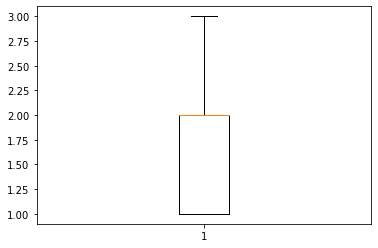

In [131]:
plt.boxplot(df['Number_of_Vehicles'])

## Number_of_Casualties

{'whiskers': [<matplotlib.lines.Line2D at 0x16915e500>,
 'caps': [<matplotlib.lines.Line2D at 0x16915ea40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1690dac80>],
 'medians': [<matplotlib.lines.Line2D at 0x16915ef80>],
 'fliers': [<matplotlib.lines.Line2D at 0x16915f220>],
 'means': []}

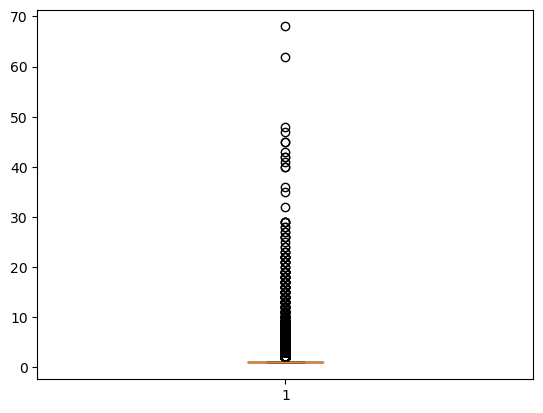

In [164]:
plt.boxplot(df['Number_of_Casualties'])

In [75]:
df['Number_of_Casualties'].value_counts()

1.0     797771
2.0     173058
3.0      49087
4.0      17835
5.0       6609
6.0       2470
7.0        866
8.0        360
9.0        176
10.0        95
11.0        57
13.0        32
12.0        31
14.0        20
15.0        17
17.0        13
16.0        11
19.0        10
22.0         8
18.0         8
21.0         5
26.0         4
29.0         4
20.0         3
23.0         3
42.0         2
45.0         2
24.0         2
40.0         2
28.0         2
27.0         2
32.0         1
48.0         1
47.0         1
62.0         1
35.0         1
68.0         1
25.0         1
36.0         1
41.0         1
43.0         1
Name: Number_of_Casualties, dtype: int64

In [164]:
Q1 = df['Number_of_Casualties'].quantile(0.01)
Q2 = df['Number_of_Casualties'].quantile(0.99)

print("one percentile:",Q1)
print("99th percentile:",Q2)

one percentile: 1.0
99th percentile: 5.0


In [167]:
df['Number_of_Casualties'] = mstats.winsorize(df['Number_of_Casualties'], limits=[0.01, 0.01],inplace=True)

df['Number_of_Casualties'].value_counts()


1.0    797771
2.0    173058
3.0     49087
4.0     17835
5.0     10824
Name: Number_of_Casualties, dtype: int64

## Did_Police_Officer_Attend_Scene_of_Accident

{'whiskers': [<matplotlib.lines.Line2D at 0x7faad9d91c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7faad9d91670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faad9d91490>],
 'medians': [<matplotlib.lines.Line2D at 0x7facc01f6970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7facc01f6070>],
 'means': []}

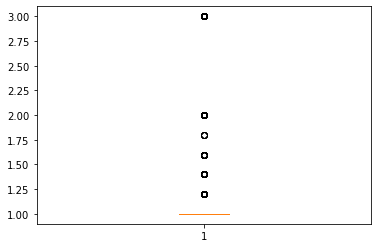

In [116]:
plt.boxplot(df['Did_Police_Officer_Attend_Scene_of_Accident'])

In [104]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()

1.0    843132
2.0    202135
3.0      3066
1.2       119
1.4        71
1.6        47
1.8         5
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

In [105]:
df.Did_Police_Officer_Attend_Scene_of_Accident.describe()

count    1.048575e+06
mean     1.198700e+00
std      4.062268e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      3.000000e+00
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: float64

In [169]:
Q1= df['Did_Police_Officer_Attend_Scene_of_Accident'].quantile(0.01)
Q2= df['Did_Police_Officer_Attend_Scene_of_Accident'].quantile(0.99)
print("one percentile:",Q1)
print("99th percentile:",Q2)


one percentile: 1.0
99th percentile: 2.0


In [170]:
# Winsorize at the one and 99th percentiles

df['Did_Police_Officer_Attend_Scene_of_Accident'] = mstats.winsorize(df['Did_Police_Officer_Attend_Scene_of_Accident'], limits=[0.01, 0.01],inplace=True)

print(winsorized_data)

[1. 1. 1. ... 1. 1. 1.]


In [142]:
df.Did_Police_Officer_Attend_Scene_of_Accident.describe()

count    1.048575e+06
mean     1.195776e+00
std      3.967389e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      2.000000e+00
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7facfb89f3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7facf8c58730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7facc80a2550>],
 'medians': [<matplotlib.lines.Line2D at 0x7facc8090790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7facc8090730>],
 'means': []}

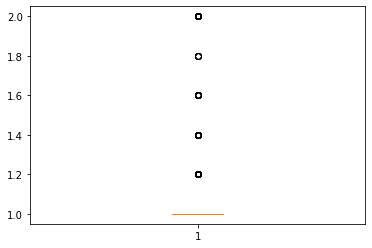

In [127]:
plt.boxplot(df['Did_Police_Officer_Attend_Scene_of_Accident'])

In [76]:
df['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()

1.0    843132
2.0    202135
3.0      3066
1.2       119
1.4        71
1.6        47
1.8         5
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

##### Dropping rows. containing un wanted data

## Pedestrian_Crossing-Human_Control

In [172]:
Q1= df['Pedestrian_Crossing-Human_Control'].quantile(0.01)
Q2= df['Pedestrian_Crossing-Human_Control'].quantile(0.99)
print("one percentile:",Q1)
print("99th percentile:",Q2)

one percentile: 0.0
99th percentile: 0.0


In [173]:
df['Pedestrian_Crossing-Human_Control'].value_counts()

0.0    1042423
2.0       3593
1.0       2557
0.8          1
0.4          1
Name: Pedestrian_Crossing-Human_Control, dtype: int64

In [174]:
df['Pedestrian_Crossing-Human_Control'] = mstats.winsorize(df['Pedestrian_Crossing-Human_Control'], limits=[0.01, 0.01],inplace=True)

df['Pedestrian_Crossing-Human_Control'].value_counts()

0.0    1048575
Name: Pedestrian_Crossing-Human_Control, dtype: int64

## Pedestrian_Crossing-Physical_Facilities

Pedestrian Crossing-Physical Facilities refer to the infrastructure and features designed to facilitate safe pedestrian crossings of roads or other transportation routes

This column shows the number of vehicles involved in the accident

In [194]:
Q1= df['Pedestrian_Crossing-Physical_Facilities'].quantile(0.01)
Q2= df['Pedestrian_Crossing-Physical_Facilities'].quantile(0.99)

print("one percentile:",Q1)
print("99th percentile:",Q2)
print(lower)
print(upper)

one percentile: 0.0
99th percentile: 8.0
0.0
0.0


In [176]:
df['Pedestrian_Crossing-Physical_Facilities'].value_counts()

0.0    886271
5.0     64494
4.0     52458
1.0     25694
8.0     16850
7.0      2798
1.6         3
0.8         2
1.8         1
3.0         1
0.2         1
5.2         1
1.4         1
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64

In [189]:
df['Pedestrian_Crossing-Physical_Facilities'].describe()

count    1.048575e+06
mean     6.793982e-01
std      1.749363e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.000000e+00
Name: Pedestrian_Crossing-Physical_Facilities, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7facc340ff40>,
 'caps': [<matplotlib.lines.Line2D at 0x7facc341e520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7facc340fc70>],
 'medians': [<matplotlib.lines.Line2D at 0x7facc341eac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7facc341ed90>],
 'means': []}

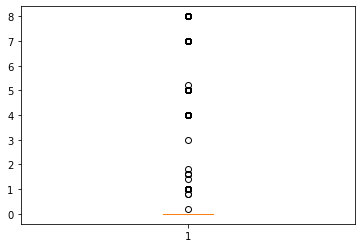

In [177]:
plt.boxplot(df['Pedestrian_Crossing-Physical_Facilities'])

In [188]:
# Calculate z-scores
z_scores = stats.zscore(df['Pedestrian_Crossing-Physical_Facilities'])
# Define a threshold for outlier detection
threshold = 3
# Find outliers
outliers = np.where(np.abs(z_scores) > threshold)

print(outliers)
print(z_scores)

(array([      9,     231,     661, ..., 1047839, 1048049, 1048435]),)
0          0.183268
1          2.469815
2         -0.388369
3         -0.388369
4         -0.388369
             ...   
1048570   -0.388369
1048571   -0.388369
1048572   -0.388369
1048573   -0.388369
1048574   -0.388369
Name: Pedestrian_Crossing-Physical_Facilities, Length: 1048575, dtype: float64


## Droping columns and Model fitting without outlier treatment

In [65]:
## Encoding of categorical Variables
from sklearn.preprocessing import LabelEncoder


In [133]:
df1 = df.drop(columns=['Accident_Index','1st_Road_Number','2nd_Road_Number','Carriageway_Hazards','Date','Day_of_Week','Did_Police_Officer_Attend_Scene_of_Accident','Local_Authority_(Highway)','Location_Northing_OSGR','Location_Easting_OSGR','Police_Force','Special_Conditions_at_Site','Time','Year','InScotland'],axis=1)


In [182]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   1st_Road_Class                           1048575 non-null  object 
 1   2nd_Road_Class                           1048575 non-null  object 
 2   Accident_Severity                        1048575 non-null  object 
 3   Junction_Control                         1048575 non-null  object 
 4   Junction_Detail                          1048575 non-null  object 
 5   Latitude                                 1048575 non-null  float64
 6   Light_Conditions                         1048575 non-null  object 
 7   Local_Authority_(District)               1048575 non-null  object 
 8   Longitude                                1048575 non-null  float64
 9   LSOA_of_Accident_Location                1048575 non-null  object 
 10  Number_of_Casualti

In [183]:
Accident_Severity=df1.iloc[:,2]

In [184]:
Accident_Severity

0          Serious
1           Slight
2           Slight
3           Slight
4           Slight
            ...   
1048570     Slight
1048571     Slight
1048572     Slight
1048573    Serious
1048574    Serious
Name: Accident_Severity, Length: 1048575, dtype: object

In [185]:
remaining_columns = df1.drop('Accident_Severity', axis=1)

In [186]:
remaining_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   1st_Road_Class                           1048575 non-null  object 
 1   2nd_Road_Class                           1048575 non-null  object 
 2   Junction_Control                         1048575 non-null  object 
 3   Junction_Detail                          1048575 non-null  object 
 4   Latitude                                 1048575 non-null  float64
 5   Light_Conditions                         1048575 non-null  object 
 6   Local_Authority_(District)               1048575 non-null  object 
 7   Longitude                                1048575 non-null  float64
 8   LSOA_of_Accident_Location                1048575 non-null  object 
 9   Number_of_Casualties                     1048575 non-null  float64
 10  Number_of_Vehicles

In [187]:
# Extract the numerical features
numerical_features1 = remaining_columns.select_dtypes(include=['float64', 'int64'])


In [188]:
numerical_features1 


,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit
0,51.489096,-0.191170,1.0,1.0,0.0,1.0,30.0
1,51.520075,-0.211708,1.0,1.0,0.0,5.0,30.0
2,51.525301,-0.206458,1.0,2.0,0.0,0.0,30.0
3,51.482442,-0.173862,1.0,1.0,0.0,0.0,30.0
4,51.495752,-0.156618,1.0,1.0,0.0,0.0,30.0
...,...,...,...,...,...,...,...
1048570,57.374005,-3.467828,2.0,1.0,0.0,0.0,60.0
1048571,57.232273,-3.809281,1.0,1.0,0.0,0.0,60.0
1048572,57.585044,-3.862727,1.0,3.0,0.0,0.0,30.0
1048573,57.214898,-3.823997,1.0,2.0,0.0,0.0,60.0


In [157]:
remaining_columns['Number_of_Casualties'].value_counts()

1.0     797771
2.0     173058
3.0      49087
4.0      17835
5.0       6609
6.0       2470
7.0        866
8.0        360
9.0        176
10.0        95
11.0        57
13.0        32
12.0        31
14.0        20
15.0        17
17.0        13
16.0        11
19.0        10
22.0         8
18.0         8
21.0         5
26.0         4
29.0         4
20.0         3
23.0         3
42.0         2
45.0         2
24.0         2
40.0         2
28.0         2
27.0         2
32.0         1
48.0         1
47.0         1
62.0         1
35.0         1
68.0         1
25.0         1
36.0         1
41.0         1
43.0         1
Name: Number_of_Casualties, dtype: int64

In [141]:
# Extract the categorical features
categorical_features1 = remaining_columns.select_dtypes(include=['object'])

In [142]:
categorical_features1

,1st_Road_Class,2nd_Road_Class,Junction_Control,Junction_Detail,Light_Conditions,Local_Authority_(District),LSOA_of_Accident_Location,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions
0,A,missing,Data missing or out of range,Not at junction or within 20 metres,missing,Kensington and Chelsea,E01002849,Wet or damp,Single carriageway,Urban,Raining no high winds
1,B,C,Auto traffic signal,Crossroads,Darkness - lights lit,Kensington and Chelsea,E01002909,Dry,Dual carriageway,Urban,Fine no high winds
2,C,missing,Data missing or out of range,Not at junction or within 20 metres,Darkness - lights lit,Kensington and Chelsea,E01002857,Dry,Single carriageway,Urban,Fine no high winds
3,A,missing,Data missing or out of range,Not at junction or within 20 metres,missing,Kensington and Chelsea,E01002840,Dry,Single carriageway,Urban,Fine no high winds
4,missing,missing,Data missing or out of range,Not at junction or within 20 metres,Darkness - lighting unknown,Kensington and Chelsea,E01002863,Wet or damp,Single carriageway,Urban,Fine no high winds
...,...,...,...,...,...,...,...,...,...,...,...
1048570,A,missing,Data missing or out of range,Not at junction or within 20 metres,Daylight,Highland,missing,Dry,Single carriageway,Rural,Fine no high winds
1048571,A,missing,Data missing or out of range,Not at junction or within 20 metres,Darkness - no lighting,Highland,missing,Frost or ice,Single carriageway,Rural,Fine no high winds
1048572,A,Unclassified,Give way or uncontrolled,T or staggered junction,Daylight,Highland,missing,Frost or ice,Single carriageway,Rural,Fine no high winds
1048573,A,Unclassified,Give way or uncontrolled,T or staggered junction,Darkness - no lighting,Highland,missing,Wet or damp,Single carriageway,Rural,Fine no high winds


#### Label encoding

In [143]:

label_encoder=LabelEncoder()
for categorical_features1 in categorical_features1:
   remaining_columns[categorical_features1]= label_encoder.fit_transform(remaining_columns[categorical_features1])

remaining_columns.head()

,1st_Road_Class,2nd_Road_Class,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions
0,0,6,3,4,51.489096,5,185,-0.191170,2829,1.0,1.0,0.0,1.0,4,3,30.0,2,5
1,2,3,2,0,51.520075,1,185,-0.211708,2889,1.0,1.0,0.0,5.0,0,0,30.0,2,1
2,3,6,3,4,51.525301,1,185,-0.206458,2837,1.0,2.0,0.0,0.0,0,3,30.0,2,1
3,0,6,3,4,51.482442,5,185,-0.173862,2820,1.0,1.0,0.0,0.0,0,3,30.0,2,1
4,5,6,3,4,51.495752,0,185,-0.156618,2843,1.0,1.0,0.0,0.0,4,3,30.0,2,1


In [144]:
## importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [145]:
# spliting the data into train and test

X = remaining_columns  # Use all columns as input features
y = Accident_Severity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
X_train.shape

(838860, 18)

In [170]:
# Create an instance of the DecisionTreeClassifier with Gini impurity
clf = DecisionTreeClassifier(criterion='entropy')



In [171]:
# Train the decision tree model
clf.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy')

In [172]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [173]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7548673199341964
